In [20]:
import numpy as np
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, Activation
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [4]:
# download cifar dataset
from tensorflow.keras.datasets import cifar10

In [5]:
# setting random seed so that initial value of random variable will be the same
from numpy.random import seed
seed(42)

In [6]:
# get fashion cifar10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

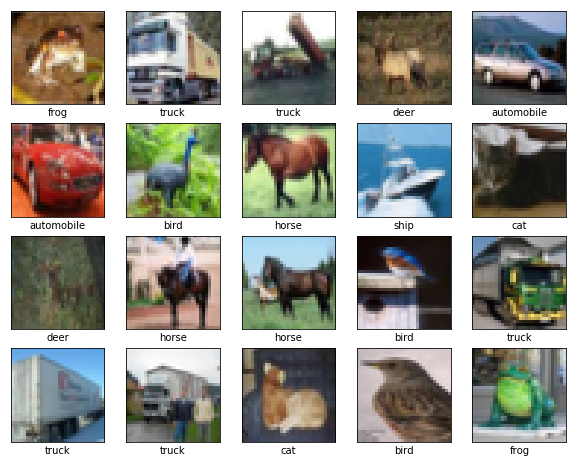

In [9]:
# diplay random images from training dataset
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(categories[y_train[i][0]])
plt.show()

In [10]:
# dimensions of training data
print("dimensions of training data: {shape}".format(shape=x_train.shape))
print("dimensions of training data: {shape}".format(shape=y_train.shape))

# dimensions of test set
print("dimensions of test set: {shape}".format(shape=x_test.shape))
print("dimensions of test set: {shape}".format(shape=y_test.shape))

dimensions of training data: (50000, 32, 32, 3)
dimensions of training data: (50000, 1)
dimensions of test set: (10000, 32, 32, 3)
dimensions of test set: (10000, 1)


In [11]:
batch_size = 32
num_classes = 10
epochs = 10

In [12]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
# preprocessing (standardization) dataset
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# buid model

In [24]:
model = Sequential()

#Conv Layer 1, The 1st convolutional layer filters the 224×224×3 input image with 96 kernels of size 11×11×3 with a stride of 
# 4 pixles
model.add(Conv2D(filters=96, input_shape=(32, 32, 3), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# Conv Layer 2, The 2nd convolutional layer takes as input the output of the 1st convolutional layer and filters it 
# with 256 kernels of size 5 × 5 × 48
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='same'))
# we can also add batch normalization steps here. To make more changes, we can set padding='same'
model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# The 3rd, 4th and 5th layers are convolutional layers with filter size 3×3 and a stride of 1 pixel. These layers layers are 
# connected to one another without any intervening pooling or normalization layers. The first two used 384 
# filters where the third used 256 filters

# Conv Layer 3
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# Conv Layer 4
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# Conv Layer 5
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# flatten the architecture for fully Connected layer

model.add(Flatten())

# 1st Fully Connected Layer
# model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Dense(4096))
model.add(Activation('relu'))

# Dropout layer, we can change the value 0.4 as experiments to see the different result

model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))

# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 8, 8, 96)          34944     
_________________________________________________________________
activation_10 (Activation)   (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 256)         2973952   
_________________________________________________________________
activation_11 (Activation)   (None, 4, 4, 256)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 2, 2, 384)        

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001, decay=1e-6), loss=tf.keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [27]:
train_model = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 797s 16ms/sample - loss: 1.8396 - acc: 0.2763 - val_loss: 1.5496 - val_acc: 0.4227
Epoch 2/10
50000/50000 [==============================] - 754s 15ms/sample - loss: 1.4217 - acc: 0.4801 - val_loss: 1.3458 - val_acc: 0.5098
Epoch 3/10
50000/50000 [==============================] - 788s 16ms/sample - loss: 1.2306 - acc: 0.5574 - val_loss: 1.2090 - val_acc: 0.5684
Epoch 4/10
50000/50000 [==============================] - 943s 19ms/sample - loss: 1.0905 - acc: 0.6139 - val_loss: 1.1742 - val_acc: 0.5878
Epoch 5/10
50000/50000 [==============================] - 578s 12ms/sample - loss: 0.9559 - acc: 0.6640 - val_loss: 1.1505 - val_acc: 0.6020
Epoch 6/10
50000/50000 [==============================] - 583s 12ms/sample - loss: 0.8236 - acc: 0.7137 - val_loss: 1.1866 - val_acc: 0.5999
Epoch 7/10
50000/50000 [==============================] - 593s 12ms/sample - loss: 0.7017 - acc: 0.7574 